# A. CLIP raster by raster extent

In [ ]:
import os
import rioxarray
import rasterio as rst
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import box
import matplotlib.pyplot as plt
class fonttype:
    BOLD = '\033[1m'
    END = '\033[0m'

In [ ]:
classified = 'ANSU_Clip.tif'
bathy = 'bathy.tif'
local_dir = 'C:/TEST'

In [ ]:
def clip_to_raster(raster, geometry, out_dir=None):
    with rioxarray.open_rasterio(raster) as xds:
        clipped_raster = xds.rio.clip(geometry)[0]
        if out_dir != None:
            out_path = os.path.join(out_dir, '{}_Clip.tif'.format(raster.split('\\')[-1][:-4]))
            clipped_raster.rio.to_raster(out_path, dtype="float32")
            print('Clipped raster:',fonttype.BOLD + f'{out_path}' + fonttype.END )
        return clipped_raster, out_path

In [ ]:
with rst.open(classified) as src:
    bbox = MultiPolygon([box(*src.bounds)])

In [ ]:
clip_output, clip_path = clip_to_raster(bathy, bbox, out_dir=local_dir)

In [ ]:
with rst.open(clip_path) as src:
    array = src.read(1)
    plt.imshow(array)
    plt.show() 

# B. CLIP raster by shp

In [7]:
import os
import geopandas
import rioxarray
import rasterio as rst
import matplotlib.pyplot as plt
class fonttype:
    BOLD = '\033[1m'
    END = '\033[0m'

In [8]:
shp ="/AOI_Demo.shp"
raster = '/mosaic.tif'
local_dir = 'C:/TEST'


In [9]:
shp_file = geopandas.read_file(shp)
raster_file = rioxarray.open_rasterio(raster).squeeze()

print('Shp crs: ', shp_file.crs)
print('Raster crs: ', raster_file.crs)

shp_file_crs = shp_file.to_crs(raster_file.crs)

print('Shp new crs:', shp_file_crs.crs)

Shp crs:  epsg:4326
Raster crs:  EPSG:32618
Shp new crs: EPSG:32618


In [10]:
# clipped = raster_file.rio.clip(shp_file_crs.geometry, shp_file_crs.crs, drop=False, invert=False)
clipped = raster_file.rio.clip(shp_file_crs.geometry)

In [11]:
# Save the clipped raster
img_name = raster.split('\\')[-1][:-4]
out_name = os.path.join(local_dir, f'{img_name}_Clipped.tif')
clipped_AOI = clipped.rio.to_raster(out_name, tiled=True, dtype="float32")
print('Clipped raster:',fonttype.BOLD + f'{out_name}' + fonttype.END )

Clipped raster: /ncr2421/SDB_Garmin_Bahamas/18RTQ/20210523/Input/mosaic_Clipped.tif


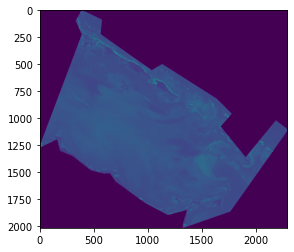

In [12]:
with rst.open(out_name) as src:
    array = src.read(1)
    plt.imshow(array)
    plt.show()